# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [32]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
#define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q="


# set lists for the dataframe
cities_1 = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            cities_1.append(city)
        else:
            count_one += 1
            cities_1.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")
        

Processing Record 1 of Set 1 | nome
Processing Record 2 of Set 1 | nanortalik
Processing Record 3 of Set 1 | vanimo
City not found. Skipping...
Processing Record 4 of Set 1 | harper
Processing Record 5 of Set 1 | ancud
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | saint-joseph
Processing Record 9 of Set 1 | severo-kurilsk
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | norman wells
Processing Record 12 of Set 1 | yushala
City not found. Skipping...
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | faanui
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | ust-kut
City not found. Skipping...
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | dicabisagan
City not found. Skipping...
Processing Record 20 of Set 1 | awbari
Processing Record 21 of Set 1 | pochutla
Processing Record 22 

Processing Record 36 of Set 4 | yulara
City not found. Skipping...
Processing Record 37 of Set 4 | kargala
Processing Record 38 of Set 4 | hami
Processing Record 39 of Set 4 | castro
Processing Record 40 of Set 4 | oranjemund
Processing Record 41 of Set 4 | megion
Processing Record 42 of Set 4 | litoral del san juan
Processing Record 43 of Set 4 | saint-philippe
Processing Record 44 of Set 4 | qaanaaq
Processing Record 45 of Set 4 | nagato
Processing Record 46 of Set 4 | tilichiki
Processing Record 47 of Set 4 | morden
Processing Record 48 of Set 4 | antequera
Processing Record 49 of Set 4 | hasaki
Processing Record 1 of Set 5 | shache
Processing Record 2 of Set 5 | luanda
Processing Record 3 of Set 5 | inverell
Processing Record 4 of Set 5 | paamiut
Processing Record 5 of Set 5 | thompson
Processing Record 6 of Set 5 | port elizabeth
Processing Record 7 of Set 5 | bambous virieux
Processing Record 8 of Set 5 | mecca
Processing Record 9 of Set 5 | surt
Processing Record 10 of Set 5 | p

Processing Record 30 of Set 8 | lodja
Processing Record 31 of Set 8 | angoche
Processing Record 32 of Set 8 | inverness
Processing Record 33 of Set 8 | dingle
Processing Record 34 of Set 8 | juneau
Processing Record 35 of Set 8 | imaichi
Processing Record 36 of Set 8 | bandundu
Processing Record 37 of Set 8 | teya
City not found. Skipping...
Processing Record 38 of Set 8 | kijang
Processing Record 39 of Set 8 | shenjiamen
Processing Record 40 of Set 8 | haines junction
Processing Record 41 of Set 8 | belle fourche
Processing Record 42 of Set 8 | makakilo city
Processing Record 43 of Set 8 | baherden
Processing Record 44 of Set 8 | porto velho
Processing Record 45 of Set 8 | nanakuli
Processing Record 46 of Set 8 | shenkursk
Processing Record 47 of Set 8 | rio cuarto
Processing Record 48 of Set 8 | morehead
Processing Record 49 of Set 8 | dzhebariki-khaya
Processing Record 1 of Set 9 | vrangel
Processing Record 2 of Set 9 | mandali
Processing Record 3 of Set 9 | eyl
Processing Record 4 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":cities_1,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [40]:
len(cloudinesses), len(cities_1)

(545, 545)

In [41]:
# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

In [42]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nome,90,US,1595285401,93,64.50,-165.41,285.93,3.60
1,nanortalik,2,GL,1595285369,64,60.14,-45.24,282.59,0.60
2,vanimo,66,PG,1595285433,73,-2.67,141.30,301.03,3.21
3,harper,82,LR,1595285384,87,4.38,-7.72,297.94,4.50
4,ancud,89,CL,1595285363,81,-41.87,-73.82,282.15,1.50


In [44]:
weather_dataframe.count()

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

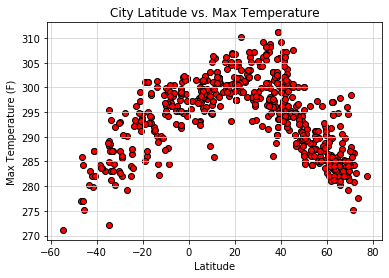

In [48]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.show()

## Latitude vs. Humidity Plot

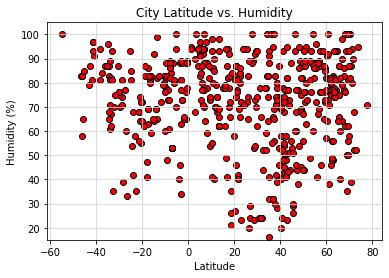

In [49]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.show()

## Latitude vs. Cloudiness Plot

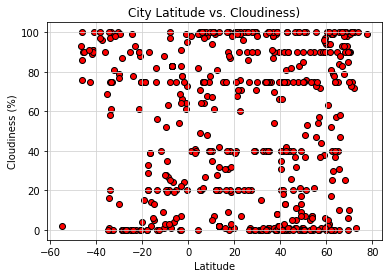

In [51]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Cloudiness)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.show()

## Latitude vs. Wind Speed Plot

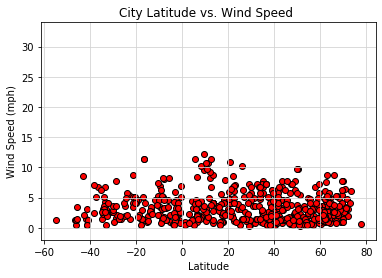

In [53]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Wind Speed ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression